In [1]:
# importing all the packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import os
import glob

In [3]:
os.getcwd()
os.chdir(r"C:\Users\pc\Documents\python files\udacity-vehicle detection and classification using svm")

coordinates: (100, 100) (200, 200)
coordinates: (300, 300) (400, 400)


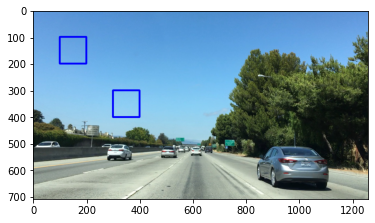

In [4]:
image= mpimg.imread("data/21-bbox-example-image.jpg")

# Define a function that takes an image, a list of bounding boxes, 
# and optional color tuple and line thickness as inputs
# then draws boxes in that color on the output

def draw_boxes(img, bboxes,color=(0,0,255), thick=6):
    
    # make a copy of the image
    draw_img= np.copy(img)
    # drwaing bounding boxes on the image using cv2.rectangle function
    for i in bboxes:
        print("coordinates:", i[0],i[1])
        cv2.rectangle(draw_img, i[0],i[1], color, thick)
        # return the image copy with boxes drawn
    return draw_img


# Add bounding boxes in this format, these are just example coordinates.
bboxes = [((100, 100), (200, 200)), ((300, 300), (400, 400))]

result = draw_boxes(image, bboxes)
plt.imshow(result)
        

In [5]:
# template matching

image= mpimg.imread("data/21-bbox-example-image.jpg")

def find_matches(img,templates_list):
    
    # define an empty list to take boundary boxes coordinates
    bbox_list=[]
    # Define matching method
    # Other options include: cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCORR',
    #         'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'
    method = cv2.TM_CCOEFF_NORMED
    # Iterate through template list
    
    for template in template_list:
        # read in the templates one by one
        temp_img= mpimg.imread(template)
        # Use cv2.matchTemplate() to search the image
        result= cv2.matchTemplate(img,temp_img,method)
        # Use cv2.minMaxLoc() to extract the location of the best match
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        print(min_val, max_val, min_loc, max_loc)
        # Determine a bounding box for the match
        w, h = (temp_img.shape[1], temp_img.shape[0])
        
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        
        # Append bbox position to list
        bbox_list.append((top_left, bottom_right))
        # Return the list of bounding boxes
        
    return bbox_list


-0.48536816239356995 0.9536647200584412 (1025, 633) (270, 500)
coordinates: (270, 500) (376, 563)


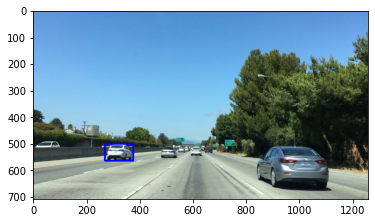

In [7]:
image= mpimg.imread("data/21-bbox-example-image.jpg")
template_list= ["data/cutout1.jpg"]

bboxes = find_matches(image, template_list)
result = draw_boxes(image, bboxes)
plt.imshow(result)

Text(0.5, 1.0, 'B Histogram')

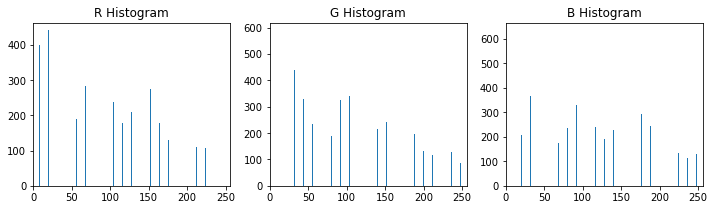

In [9]:
# Read in the image
image = mpimg.imread('data/cutout1.jpg')

# Take histograms in R, G, and B
# Arbitrarily chosen 32 bins and 
# specified range to get orderly bin sizes
rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))

# rhist[0] contains the counts in each of the bins and 
# rhist[1] contains the bin edges

# generating bin centers

bin_edges= rhist[1]
bin_centers=  (bin_edges[1:]+ bin_edges[0:len(bin_edges)-1]/2)

# Plot a figure with all three bar charts
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers, rhist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bin_centers, ghist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('B Histogram')

In [13]:
hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
hist_features

array([400, 441, 302, 244, 189, 283, 412, 433, 239, 177, 209, 302, 276,
       179, 129, 106, 104, 111, 106,  96, 111, 123, 139, 130, 167, 164,
       149, 156, 222, 268, 258,  53,  95, 219, 441, 331, 235, 179, 188,
       324, 340, 321, 252, 215, 242, 296, 244, 198, 133, 117,  98, 127,
        88, 120, 104,  88, 117, 172, 152, 142, 133, 159, 219, 589, 106,
       206, 367, 337, 230, 174, 235, 328, 316, 238, 189, 227, 261, 271,
       291, 244, 179, 148, 134, 112, 129, 123,  94,  93, 160, 138, 117,
       110, 121, 148, 219, 633], dtype=int64)

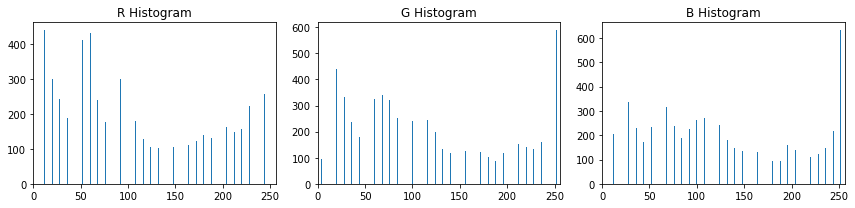

In [8]:
image = mpimg.imread('data/cutout1.jpg')

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
    
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...')

In [25]:
# Data Exploration: Car images and not-car images

notcars=glob.glob("data/non-vehicles/non-vehicles/Extras/*.png")
cars= glob.glob("data/vehicles/vehicles/GTI_Far/*.png")

Your function returned a count of 834  cars and 5068  non-cars
of size:  (64, 64, 3)  and data type: float32


Text(0.5, 1.0, 'Example Not-car Image')

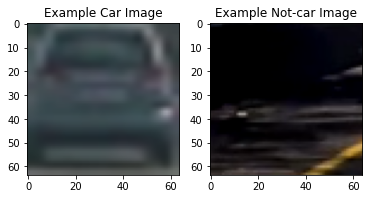

In [26]:
def data_look(car_list, notcar_list):
    
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    test_image = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = test_image.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = test_image.dtype
    # Return data_dict
    return data_dict


data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images  

car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')

Features output shape (7, 7, 2, 2, 9)


Text(0.5, 1.0, 'HOG visualisation')

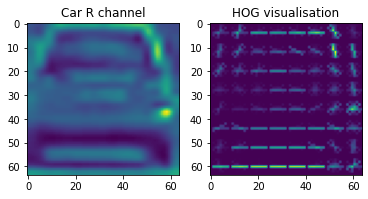

In [27]:
from skimage.feature import hog

pix_per_cell= 8
cell_per_block= 2
orient=9

img= car_image[:,:,1]

features, hog_image= hog(img,orientations= orient,pixels_per_cell=(pix_per_cell,pix_per_cell),
    cells_per_block=(cell_per_block, cell_per_block),visualize=True, feature_vector=False)


# visualise=True -> tells fn to output a viz of the HOG feature computation as well (RHS)
# feature_vector=True automatically unravels the features.

print("Features output shape", features.shape)

fig = plt.figure()
plt.subplot(121)
plt.imshow(img)
plt.title('Car R channel')

plt.subplot(122)
plt.imshow(hog_image)
plt.title('HOG visualisation')


(7, 7, 2, 2, 9)


Text(0.5, 1.0, 'HOG Visualization')

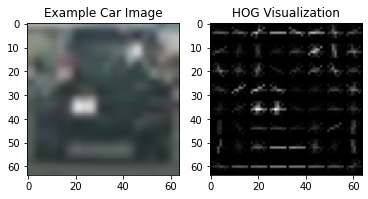

In [16]:
# hog pipeline

# Read in our vehicles and non-vehicles (done previously)
        
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        # Use skimage.hog() to get both features and a visualization
        features, hog_image = hog(img, orientations=orient,
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  transform_sqrt=True,
                                  visualize=vis,
                                  feature_vector=feature_vec)
        return features, hog_image
    else:      
        # Use skimage.hog() to get features only
        features = hog(img, orientations=orient,
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  transform_sqrt=True,
                                  visualize=vis,
                                  feature_vector=feature_vec)
        return features
    
# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
# Read in the image
image = mpimg.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

print(features.shape)
# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')

In [28]:
# normalising data using StandardScalar() from sklearn

from sklearn.preprocessing import StandardScaler

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features


# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

###### TODO ###########
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()

def extract_features(imgs,cspace= "RGB",spatial_size=(32, 32),hist_bins=32, hist_range=(0, 256)):
    
    # create a list to apppend features vector
    features= []
    
    for img in imgs:
        
        # read image by image
        image= mpimg.imread(img)
        
        # apply color conversion if other than RGB
        if cspace!='RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        else:
            feature_image= np.copy(image)
        
        # Apply bin_spatial() to get spatial color features
        spatial_color_features = bin_spatial(image, size=spatial_size)
        # Apply color_hist() to get color histogram features
        hist_features = color_hist(image, nbins=hist_bins, bins_range=hist_range)
        # Append the new feature vector to the features list
        features.append(np.concatenate([spatial_color_features, hist_features]))
        
    # Return list of feature vectors
    return features
            

In [29]:
not_car_imgs = glob.glob('data/non-vehicles/**/*.png',recursive=True)
car_imgs= glob.glob('data/vehicles/**/*.png',recursive=True)

# for i in range(5):
#     print(car_imgs[i])
#     image= mpimg.imread(car_imgs[i])
#     plt.figure()
#     plt.imshow(image)
#     plt.show()


car_features = extract_features(car_imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

notcar_features = extract_features(not_car_imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

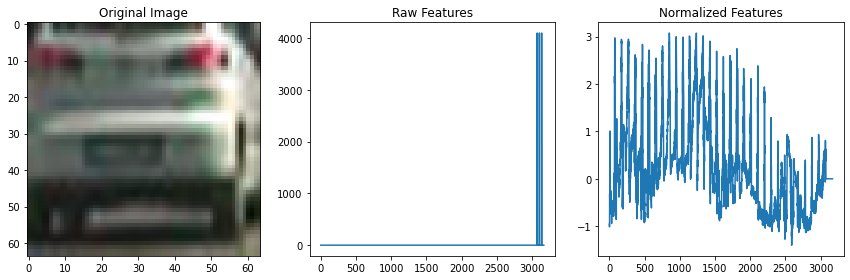

In [30]:
if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(car_imgs[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

In [31]:
#Build a classifier to distinguish car and non-car images
import time
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


#TODO play with these values to see how your classifier
# performs under different binning scenarios
spatial = 16
histbin = 32

car_features = extract_features(car_imgs, cspace='RGB', spatial_size=(spatial, spatial),
                        hist_bins=histbin, hist_range=(0, 256))
notcar_features = extract_features(not_car_imgs, cspace='RGB', spatial_size=(spatial, spatial),
                        hist_bins=histbin, hist_range=(0, 256))


# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using spatial binning of:',spatial,
    'and', histbin,'histogram bins')
print('Feature vector length:', len(X_train[0]))


# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')



Using spatial binning of: 16 and 32 histogram bins
Feature vector length: 864
20.85 Seconds to train SVC...
Test Accuracy of SVC =  0.9234
My SVC predicts:  [1. 0. 1. 1. 1. 0. 0. 1. 0. 1.]
For these 10 labels:  [1. 0. 1. 1. 1. 0. 0. 1. 0. 1.]
0.00299 Seconds to predict 10 labels with SVC


C:\Users\pc\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
